<a href="https://colab.research.google.com/github/Stedu-PhucNguyen/MachineLearning_final/blob/main/final2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Library and Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
# Load dataset
data = pd.read_csv('AmesHousing.csv', delimiter=',')  # Adjust delimiter if needed
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

# **Statistical Analysis and Data Visualization**

In [ ]:
# Basic statistics
print(data.describe())

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

<Axes: >

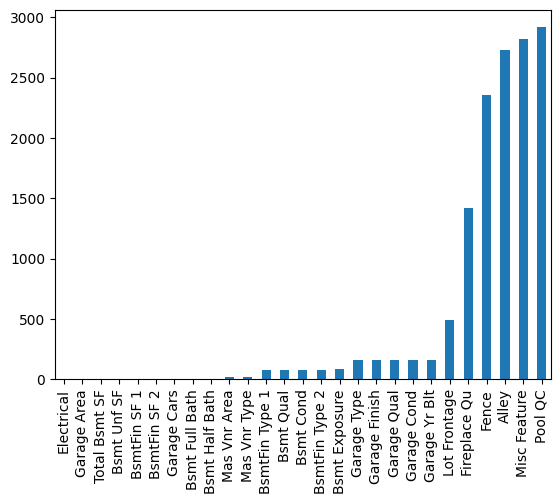

In [ ]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

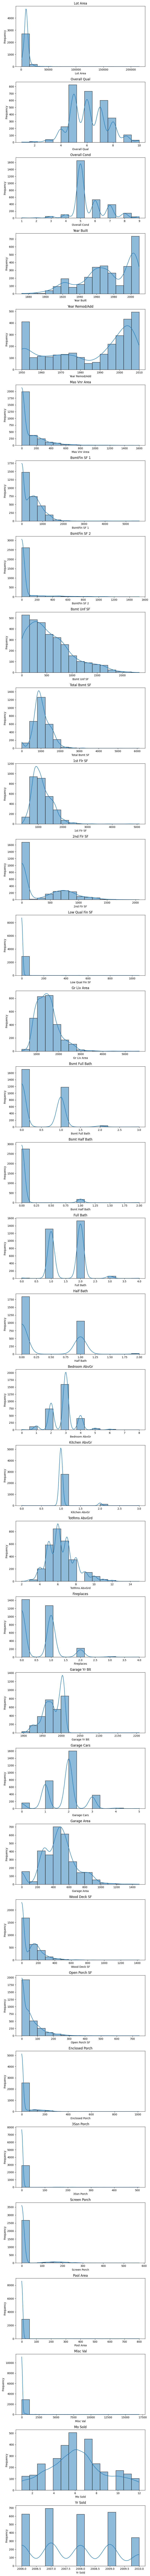

In [ ]:
# Histograms for numerical features
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_features = num_cols[4:-1]  # Assuming starting from the 5th column

# Set up subplots for numerical features
fig, axes = plt.subplots(nrows=len(num_features), ncols=1, figsize=(8, 4 * len(num_features)))
for i, column in enumerate(num_features):
    sns.histplot(data[column], bins=15, kde=True, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

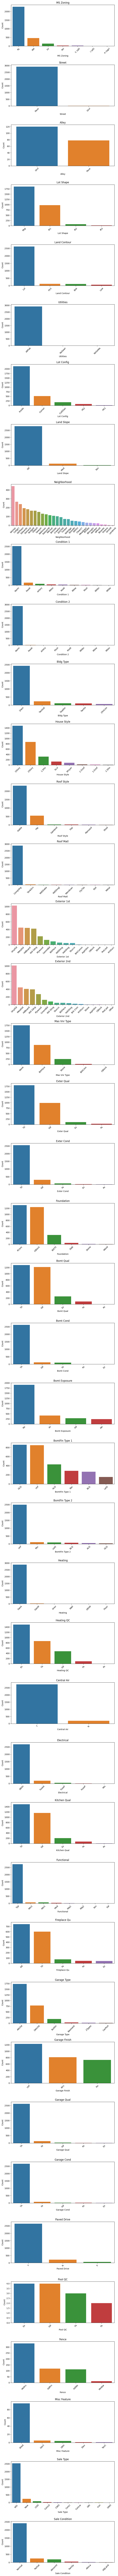

In [ ]:
# Bar plots for categorical features
cat_cols = data.select_dtypes(include=['object']).columns

# Set up subplots for categorical features
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 4 * len(cat_cols)))
for i, column in enumerate(cat_cols):
    sns.countplot(x=column, data=data, ax=axes[i], order=data[column].value_counts().index)
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

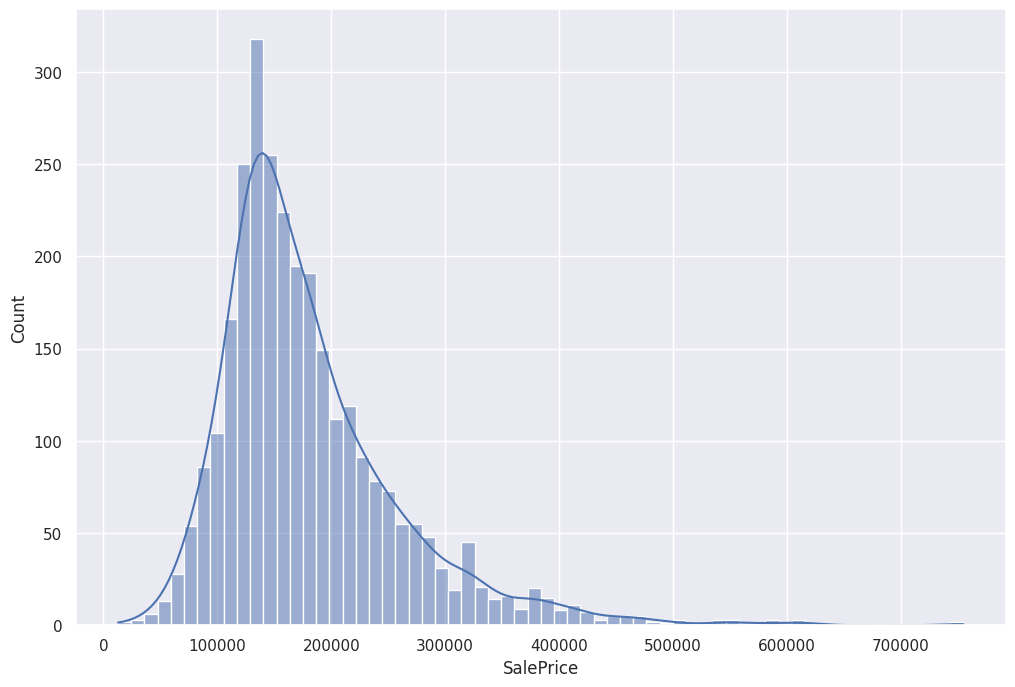

In [ ]:
# Class distribution (Sale Condition)
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data["SalePrice"], kde=True)

In [ ]:
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-11-fb3b6165116a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


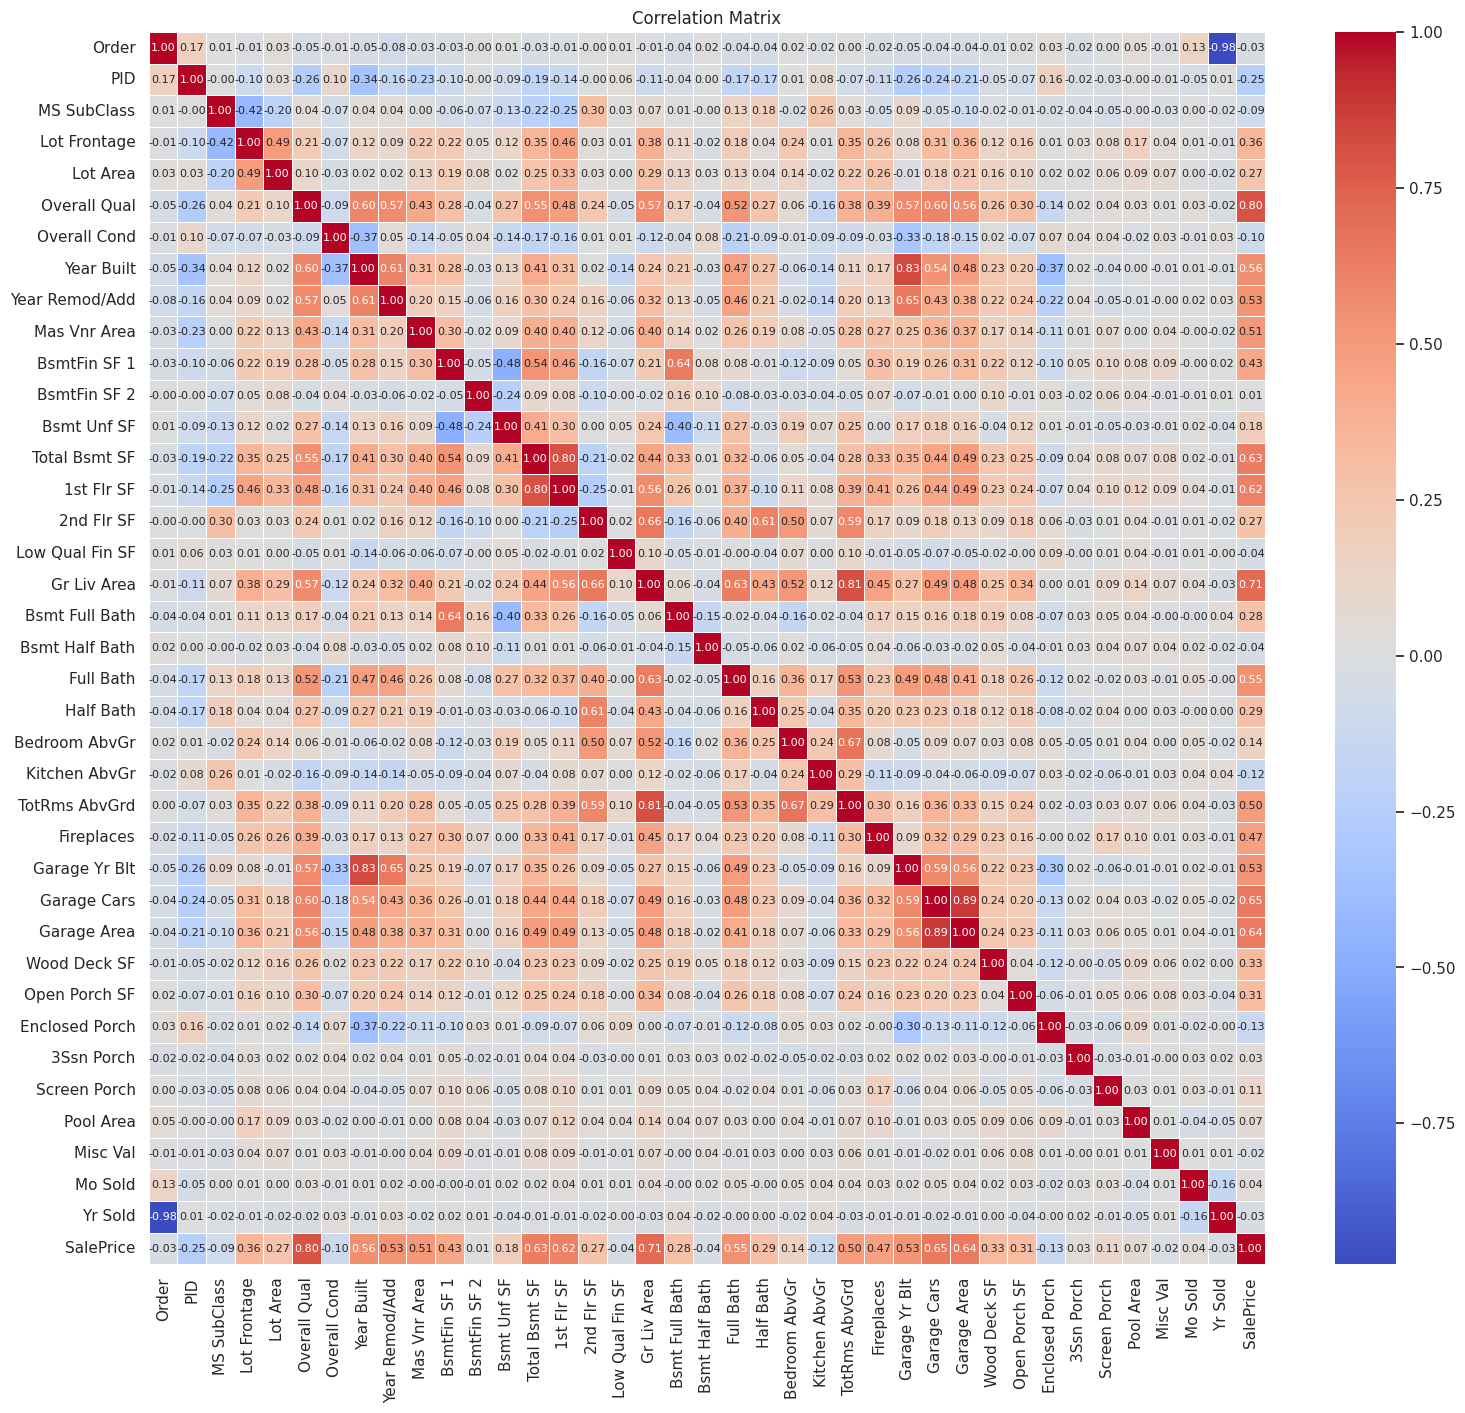

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

# **Data Processing**

In [ ]:
# Handling Missing Values
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

data[numerical_features] = numerical_transformer.fit_transform(data[numerical_features])
data[categorical_features] = categorical_transformer.fit_transform(data[categorical_features])

In [ ]:
# Split the data into training and testing sets
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor to handle both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# **Basic Machine Learning Models**

In [ ]:
# Create pipelines for each model
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])

dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', DecisionTreeRegressor())])

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(random_state=42))])

svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', SVR())])

gb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', GradientBoostingRegressor())])

In [ ]:
# Train and evaluate models
models = [lr_model, dt_model, rf_model, svm_model, gb_model]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_name = model.named_steps['regressor'].__class__.__name__
    print(f"{model_name} - Mean Squared Error: {mse}")

LinearRegression - Mean Squared Error: 865007772.3576264
DecisionTreeRegressor - Mean Squared Error: 1217511584.0409555
RandomForestRegressor - Mean Squared Error: 708026721.3828948
SVR - Mean Squared Error: 8879968884.411806
GradientBoostingRegressor - Mean Squared Error: 746472081.2523764


# **Advanced Neural Network Models RNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

In [ ]:
# Fit and transform the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Convert sparse matrix to dense array
X_train_dense = X_train_preprocessed.toarray()

# Assume a sequence length of 10 for the time series data
sequence_length_rnn = 10

# Create sequences of data for RNN
X_train_rnn = np.array([X_train_dense[i:i + sequence_length_rnn] for i in range(len(X_train_dense) - sequence_length_rnn)])
y_train_rnn = y_train.values[sequence_length_rnn:]

# Reshape data for RNN input
X_train_rnn = X_train_rnn.reshape(X_train_rnn.shape[0], X_train_rnn.shape[1], X_train_rnn.shape[2])

# Build the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model_rnn.add(Dense(units=1, activation='linear'))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
model_rnn.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=32, validation_split=0.2)

# Now you can preprocess and evaluate the test data similarly

In [ ]:
# Preprocess the test data using the same preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Convert sparse matrix to dense array
X_test_dense = X_test_preprocessed.toarray()

# Create sequences of data for RNN
X_test_rnn = np.array([X_test_dense[i:i + sequence_length_rnn] for i in range(len(X_test_dense) - sequence_length_rnn)])
y_test_rnn = y_test.values[sequence_length_rnn:]

# Reshape data for RNN input
X_test_rnn = X_test_rnn.reshape(X_test_rnn.shape[0], X_test_rnn.shape[1], X_test_rnn.shape[2])

# Evaluate the RNN model on the test data
y_pred_rnn = model_rnn.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test_rnn, y_pred_rnn)

print(f"RNN - Mean Squared Error on Test Data: {mse_rnn}")


18/18 [==============================] - 0s 2ms/step
RNN - Mean Squared Error on Test Data: 12665474395.381676


# **Advanced Neural Network Models FFNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Apply the preprocessor to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [ ]:
# Build the FFNN model with adjustments
model_ffnn = Sequential()
model_ffnn.add(Dense(128, activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
model_ffnn.add(Dropout(0.5))
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dropout(0.5))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dropout(0.5))
model_ffnn.add(Dense(1, activation='linear'))  # Assuming regression, so using linear activation

model_ffnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Convert the sparse matrix to a dense NumPy array for training and validation
X_train_dense = X_train_preprocessed.toarray()

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_dense, y_train, test_size=0.2, random_state=42
)

# Train the FFNN with the training set and validate on the validation set
model_ffnn.fit(
    X_train_split,
    y_train_split,
    epochs=50,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping],
)

In [ ]:
# Evaluate the FFNN
X_test_preprocessed = preprocessor.transform(X_test)
y_pred_ffnn = model_ffnn.predict(X_test_preprocessed)
mse_ffnn = mean_squared_error(y_test, y_pred_ffnn)
print(f"FFNN - Mean Squared Error: {mse_ffnn}")

19/19 [==============================] - 0s 2ms/step
FFNN - Mean Squared Error: 1495661656.3934548


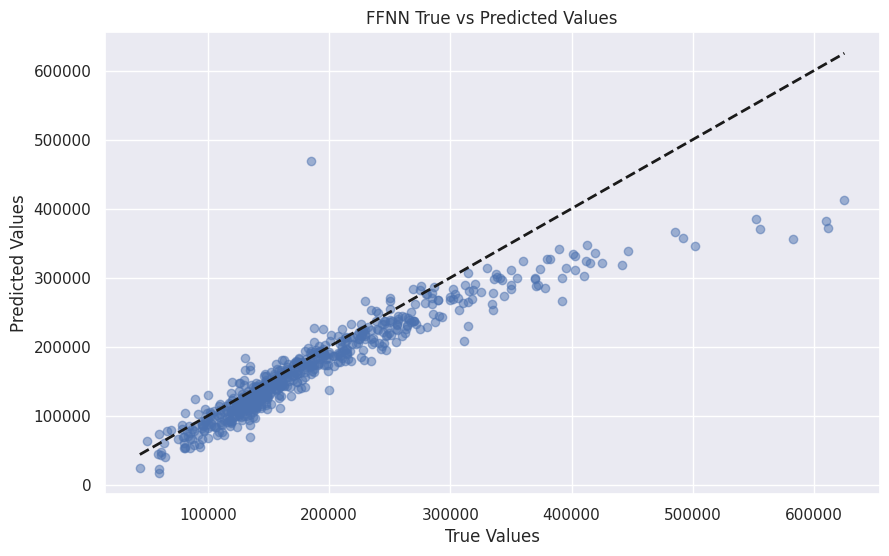

In [ ]:
# Plot true vs predicted values for FFNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ffnn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line for reference
plt.title('FFNN True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()